# SAPM Assignment 2

Calculate VaR for 1 day at 99% and 95% confidence level for the common stock of your assigned company (a) assuming normal distribution and (b) not assuming any distribution. 

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()


#some extra

from scipy.stats import norm
import yfinance as yf


In [6]:
raw = yf.download('DABUR.NS',start='2020-01-17',end ='2020-07-07')

raw.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-17,488.000000,491.950012,486.700012,489.649994,486.435760,1015739
2020-01-20,489.649994,492.700012,484.549988,486.049988,482.859375,1406615
2020-01-21,485.399994,488.350006,480.450012,487.000000,483.803162,788507
2020-01-22,489.200012,494.000000,486.250000,486.799988,483.604462,1140015
2020-01-23,486.700012,492.000000,482.750000,489.799988,486.584747,798731


In [14]:
data = raw.copy()
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-17,488.000000,491.950012,486.700012,489.649994,486.435760,1015739
2020-01-20,489.649994,492.700012,484.549988,486.049988,482.859375,1406615
2020-01-21,485.399994,488.350006,480.450012,487.000000,483.803162,788507
2020-01-22,489.200012,494.000000,486.250000,486.799988,483.604462,1140015
2020-01-23,486.700012,492.000000,482.750000,489.799988,486.584747,798731
...,...,...,...,...,...,...
2020-06-30,468.500000,472.700012,462.500000,465.950012,462.891327,4999118
2020-07-01,470.899994,471.000000,465.549988,466.600006,463.537048,2383843
2020-07-02,469.500000,471.500000,463.899994,465.049988,461.997223,2370799


## Variance-Covariance Approach / Normal Curve Approach

In [15]:
#Calculate Returns
#Ensure normal distribution of data
#norm.ppf for calculating the loss percent at corresponding confidence interval
#mean and standard deviation required for this

data['Return'] = (data['Close'] - data['Open'])/data['Open']

data.head()

,Open,High,Low,Close,Adj Close,Volume,Return
Date,,,,,,,
2020-01-17,488.000000,491.950012,486.700012,489.649994,486.435760,1015739,0.003381
2020-01-20,489.649994,492.700012,484.549988,486.049988,482.859375,1406615,-0.007352
2020-01-21,485.399994,488.350006,480.450012,487.000000,483.803162,788507,0.003296
2020-01-22,489.200012,494.000000,486.250000,486.799988,483.604462,1140015,-0.004906
2020-01-23,486.700012,492.000000,482.750000,489.799988,486.584747,798731,0.006369


In [16]:
mean = data['Return'].mean()
sdev = data['Return'].std()

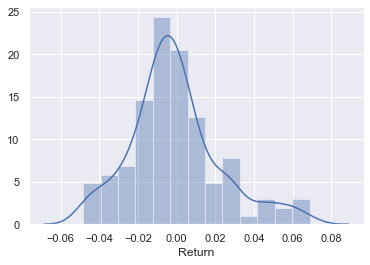

In [17]:
sns.distplot(data['Return'])

#approximately normally distributed

The method norm.ppf() takes a percentage and returns a standard deviation multiplier for what value that percentage occurs at.

It is equivalent to a, 'One-tail test' on the density plot

In [19]:

var90 = norm.ppf(1-0.9,mean,sdev)
var95 = norm.ppf(1-0.95,mean,sdev)
var99 = norm.ppf(1-0.99,mean,sdev)

print('90% VaR:',var90,"\n\n",'95% VaR',var95,'\n\n','99% VaR:',var99)

90% VaR: -0.030944409824880493 

 95% VaR -0.03945598084616561 

 99% VaR: -0.055422272538086834


In [20]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume,Return
Date,,,,,,,
2020-06-30,468.500000,472.700012,462.500000,465.950012,462.891327,4999118,-0.005443
2020-07-01,470.899994,471.000000,465.549988,466.600006,463.537048,2383843,-0.009131
2020-07-02,469.500000,471.500000,463.899994,465.049988,461.997223,2370799,-0.009478
2020-07-03,467.100006,470.750000,464.700012,467.049988,463.984100,2323284,-0.000107
2020-07-06,470.000000,470.100006,464.000000,465.950012,462.891327,1892579,-0.008617


In [35]:
print('On 7th July 2020, 90 percent chance max loss will be: ',var90*data.loc['2020-07-06','Close'])
print('On 7th July 2020, 95 percent chance max loss will be: ',var95*data.loc['2020-07-06','Close'])
print('On 7th July 2020, 99 percent chance max loss will be: ',var99*data.loc['2020-07-06','Close'])

On 7th July 2020, 90 percent chance max loss will be:  -14.418548135642443
On 7th July 2020, 95 percent chance max loss will be:  -18.38451475691126
On 7th July 2020, 99 percent chance max loss will be:  -25.82400856566297


In [28]:
data.loc['2020-07-06','Close']

465.95001220703125

## Historical Simulation

In [37]:
#sort returns by ascending order
#choose the 10%,5% and 1% return positions.
#multiply the return value by the latest stock price for corresponding loss

data1 = data.copy()
data1.sort_values('Return',inplace = True,ascending = True)
data1.head()

,Open,High,Low,Close,Adj Close,Volume,Return
Date,,,,,,,
2020-04-17,515.0,515.000000,487.200012,490.100006,486.882812,3429703,-0.048350
2020-03-18,435.0,437.250000,412.100006,414.549988,411.828705,2896377,-0.047012
2020-03-12,477.5,478.000000,451.700012,455.250000,452.261566,2856276,-0.046597
2020-03-27,441.5,445.600006,418.000000,423.000000,420.223297,3674758,-0.041903
2020-05-15,463.0,463.649994,441.350006,443.899994,440.986084,4049485,-0.041253


In [40]:
vari90 = data1['Return'].quantile(0.1)
vari95 = data1['Return'].quantile(0.05)
vari99 = data1['Return'].quantile(0.01)

In [41]:
vari90

-0.028581740216511053

In [42]:
print('On 7th July 2020, 90 percent chance max loss will be: ',vari90*data.loc['2020-07-06','Close'])
print('On 7th July 2020, 95 percent chance max loss will be: ',vari95*data.loc['2020-07-06','Close'])
print('On 7th July 2020, 99 percent chance max loss will be: ',vari99*data.loc['2020-07-06','Close'])

On 7th July 2020, 90 percent chance max loss will be:  -13.317662202781522
On 7th July 2020, 95 percent chance max loss will be:  -17.784408645223884
On 7th July 2020, 99 percent chance max loss will be:  -21.879901765699437
